In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/city_day.csv",index_col="Date",parse_dates=True)
data=data.dropna()
print("Shape of data is= ",data.shape)
data.head()

Shape of data is=  (6236, 15)


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2017-11-25,Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2017-11-26,Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2017-11-27,Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2017-11-28,Amaravati,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2017-11-29,Amaravati,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


<Axes: xlabel='Date'>

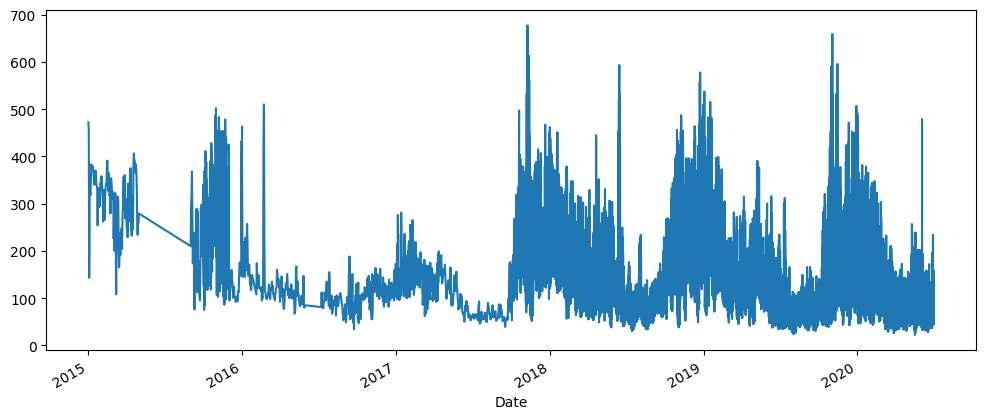

In [ ]:
#plot the data
data['AQI'].plot(figsize=(12,5))

Test for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest=adfuller(dataset,autolag='AIC')
  print("ADF: ",dftest[0])
  print("P-Value: ",dftest[1])
  print("Num of lags: ",dftest[2])
  print("Num of observations used: ",dftest[3])
  print("Critical Values: ")
  for key,val in dftest[4].items():
    print("\t",key,":",val)

In [ ]:
ad_test(data["AQI"]) #if p value is very small, the dataset is stationary

ADF:  -5.593265526109327
P-Value:  1.3143585005737766e-06
Num of lags:  18
Num of observations used:  6217
Critical Values: 
	 1% : -3.431402276350525
	 5% : -2.8620050123969447
	 10% : -2.567017523214676


Figure out order for arima

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stepwise_fit=auto_arima(data["AQI"],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62196.335, Time=10.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=62925.812, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=62913.026, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=62900.876, Time=3.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=62923.814, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=62199.110, Time=9.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=62214.300, Time=13.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=62197.600, Time=19.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=62197.798, Time=7.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=62327.519, Time=3.84 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=62197.629, Time=7.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=62203.259, Time=7.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=62199.414, Time=19.96 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=62194.356, Time=3.13 sec
 ARIMA(1,1,2)(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6236
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -31092.178
Date:                Sun, 08 Oct 2023   AIC                          62194.356
Time:                        18:05:58   BIC                          62228.045
Sample:                             0   HQIC                         62206.033
                               - 6236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3126      0.043      7.268      0.000       0.228       0.397
ar.L2          0.1331      0.035      3.815      0.000       0.065       0.201
ma.L1         -0.4553      0.043    -10.643      0.000      -0.539      -0.371
ma.L2         -0.3810      0.041     -9.206      0.000      -0.462      -0.300
sigma2      1255.7761      7.067    177.686      0.000    1241.924    1269.628
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             93833.86
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(data.shape)
train=data.iloc[:-20]
test=data.iloc[-20:]  #testing data will have last 20 elements
print(train.shape,test.shape)

(6236, 15)
(6216, 15) (20, 15)


Train the model

In [ ]:
model=ARIMA(train['AQI'],order=(2,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                 6216
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -31000.092
Date:                Sun, 08 Oct 2023   AIC                          62010.183
Time:                        18:06:01   BIC                          62043.857
Sample:                             0   HQIC                         62021.856
                               - 6216                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3112      0.043      7.244      0.000       0.227       0.395
ar.L2          0.1341      0.035      3.846      0.000       0.066       0.203
ma.L1         -0.4535      0.043    -10.619      0.000      -0.537      -0.370
ma.L2         -0.3826      0.041     -9.256      0.000      -0.464      -0.302
sigma2      1258.8171      7.102    177.245      0.000    1244.897    1272.737
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             93146.94
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Predictions for the testing dataset

In [ ]:
start,end=len(train),len(test)+len(train)-1
pred=model.predict(start=start,end=end,typ='levels')
# print(pred)
pred.index=data.index[start:end+1]
print(pred)

Date
2020-06-11    91.391798
2020-06-12    88.778682
2020-06-13    87.883849
2020-06-14    87.254833
2020-06-15    86.939037
2020-06-16    86.756379
2020-06-17    86.657170
2020-06-18    86.601793
2020-06-19    86.571251
2020-06-20    86.554317
2020-06-21    86.544950
2020-06-22    86.539763
2020-06-23    86.536892
2020-06-24    86.535303
2020-06-25    86.534423
2020-06-26    86.533936
2020-06-27    86.533667
2020-06-28    86.533518
2020-06-29    86.533435
2020-06-30    86.533389
Name: predicted_mean, dtype: float64


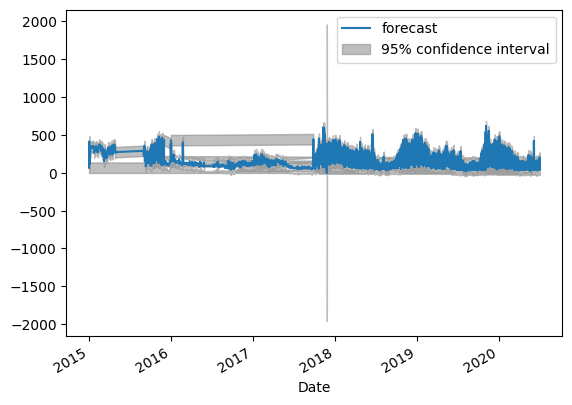

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
import matplotlib.pyplot as plt
plot_predict(model,dynamic=False)
plt.show()

<Axes: xlabel='Date'>

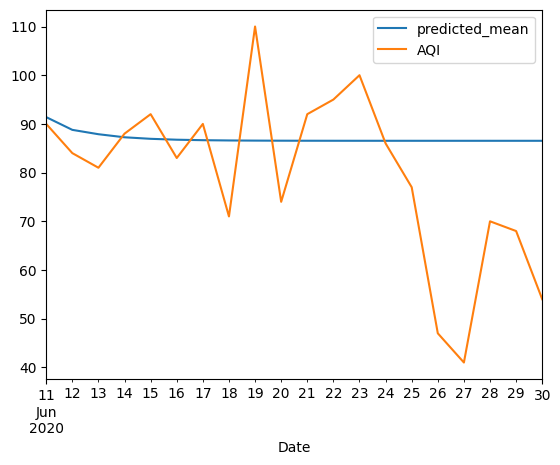

In [ ]:
pred.plot(legend=True)
test['AQI'].plot(legend=True)

In [ ]:
test['AQI'].mean()

79.65

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AQI']))
print(rmse)

18.383200137565655


In [ ]:
model2=ARIMA(data['AQI'],order=(2,1,2))
model2=model2.fit()
data.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2020-06-26,Visakhapatnam,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
2020-06-30,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
index_future_date=pd.date_range(start='2023-08-19',end='2023-09-18')
pred=model2.predict(start=len(data),end=len(data)+30,typ='levels').rename("ARIMA predictions")
pred.index=index_future_date
print(pred)

2023-08-19    59.068049
2023-08-20    64.383416
2023-08-21    66.719668
2023-08-22    68.157465
2023-08-23    68.917893
2023-08-24    69.346980
2023-08-25    69.582330
2023-08-26    69.713014
2023-08-27    69.785192
2023-08-28    69.825150
2023-08-29    69.847248
2023-08-30    69.859475
2023-08-31    69.866238
2023-09-01    69.869980
2023-09-02    69.872050
2023-09-03    69.873195
2023-09-04    69.873828
2023-09-05    69.874179
2023-09-06    69.874372
2023-09-07    69.874480
2023-09-08    69.874539
2023-09-09    69.874572
2023-09-10    69.874590
2023-09-11    69.874600
2023-09-12    69.874606
2023-09-13    69.874609
2023-09-14    69.874610
2023-09-15    69.874611
2023-09-16    69.874612
2023-09-17    69.874612
2023-09-18    69.874612
Freq: D, Name: ARIMA predictions, dtype: float64
